In [4]:
import findspark
findspark.init("C:\spark")

import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf  # Conf = configuration

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Spark bağlantısının yapıldığı bilgiler

spark = SparkSession.builder.master("local").appName("pyspark giris").getOrCreate()

sc = spark.sparkContext # Bağlantı bilgisi

sc

<SparkContext master=local appName=pyspark giris>

In [3]:
# Veri setinin okunması

spark_df = spark.read.csv("churn.csv" , header=True , inferSchema=True)

spark_df.show()

+---+-------------------+----+--------------+---------------+-----+---------+-----+
|_c0|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+-------------------+----+--------------+---------------+-----+---------+-----+
|  0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|  8|        Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0

# Veri Görselleştirme

In [5]:
sns.barplot(x="Churn" , y=spark_df.Churn.index , data=spark_df)

# Pandas'a göre yaptığımız için hata aldık. 
# Spark'ta görselleştirme yaparken önce sonuçları pandas'a dönüştürmemiz ve dönüştürme işlemlerinden sonra da dönüşen pandas dataframe'i üzerinden yapmamız gerek.

AttributeError: 'DataFrame' object has no attribute 'get'

In [7]:
# Spark df'ini Pandas df'ine indirgedik

sdf = spark_df.toPandas()

sdf.head()

,_c0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


<Axes: xlabel='Churn'>

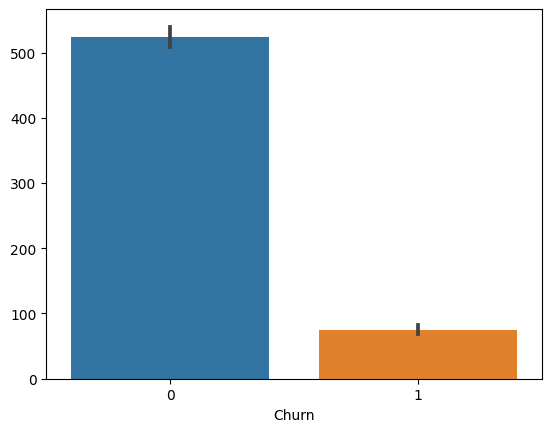

In [9]:
sns.barplot(x="Churn" , y=sdf.Churn.index , data=sdf)

In [14]:
# Görselleştirmek istediğimiz şey her neyse onu indirgeyip, Pandas df'e dönüştürüp görselleştirmek daha mantıklıdır. Çünkü büyük veriyi direkt görselleştirmek mümkün değildir...
# ... (Bizim kullandığımız çok çok büyük bir veri seti değil)

a = spark_df.groupBy("Churn").count().toPandas()
a

,Churn,count
0,1,150
1,0,750


In [16]:
sc.stop()